In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib tk

In [31]:
from vagusNerve.nerveSetup import getFasciclePositions

In [32]:
fascPos = getFasciclePositions()

In [33]:
from vagusNerve.recruitment import Recruitment

In [34]:
stimulusDirectory = {"myelinated":'../Data/TitrationBetterConductivity_Standoff_HighConductivity.xlsx'
                     }

In [35]:
current = np.linspace(0,500,1000)*10/173

In [36]:
diameters = [4e-6]

In [37]:
recruitmentCurves = []
for i in range(39):
    recruitment = Recruitment(current,diameters,i,stimulusDirectory)
    recruitmentCurves.append(recruitment)
recruitmentCurves = np.array(recruitmentCurves)[:,0,:]

In [9]:
recruitmentCurves.shape

(39, 1000)

In [11]:
plt.figure()
for i in range(39):
    plt.plot(current,recruitmentCurves[i])

In [38]:
def logistic(x, k,x0):
    return 1/(1+np.exp(-k*(x-x0)))

In [39]:
from scipy.optimize import curve_fit

In [40]:
fits = []
for i in range(39):
    fits.append(curve_fit(logistic,current,recruitmentCurves[i])[0])
fits = np.array(fits)

In [29]:
plt.figure()
plt.scatter(fascPos[:,0],fascPos[:,1],c=fits[:,0])
plt.scatter(fascPos[1,0],fascPos[1,1],c='r')
plt.scatter(fascPos[0,0],fascPos[0,1],c='r')

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
transform = pca.fit_transform(fascPos[:,:2])

In [44]:
transform -= np.mean(transform,axis=0)

In [54]:
plt.figure(figsize=(4,2))
plt.scatter(transform[:,0],transform[:,1])
plt.colorbar()

In [70]:
plt.figure()
plt.scatter(transform[:,0],fits[:,0])

In [52]:
plt.figure()
plt.scatter(transform[:,0],fits[:,1])

In [ ]:
def fitSlope(positions):

    xPos = positions[:,0]
    yPos = positions[:,1]
    

In [55]:
stimulusDirectory = {"myelinated":r"D:\vagusNerve\VerticalElectrode\Titration_Sim" + str(0) + ".xlsx"
                     }

In [56]:
current = np.linspace(0,5000,10000)/24.38

In [57]:
recruitmentCurves = []
for i in range(39):
    recruitment = Recruitment(current,diameters,i,stimulusDirectory)
    recruitmentCurves.append(recruitment)
recruitmentCurves = np.array(recruitmentCurves)[:,0,:]

In [58]:
plt.figure()
for i in range(39):
    plt.plot(current,recruitmentCurves[i])

In [59]:
fits = []
for i in range(39):
    fits.append(curve_fit(logistic,current,recruitmentCurves[i],maxfev=10000)[0])
fits = np.array(fits)

In [60]:
plt.figure()
plt.hist(fits[:,0])

(array([16.,  7.,  5.,  4.,  3.,  1.,  0.,  2.,  0.,  1.]),
 array([ 0.8140835 ,  2.57375273,  4.33342196,  6.09309119,  7.85276041,
         9.61242964, 11.37209887, 13.1317681 , 14.89143733, 16.65110656,
        18.41077579]),
 <BarContainer object of 10 artists>)

In [61]:
fasciclesLeft = [0,1,2,3,4,5,6,7,8,9,12,14,16,18,19]
fasciclesRight = np.delete(np.arange(39),fasciclesLeft)

In [74]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fascPos[:,0],fascPos[:,1],fits[:,1],c=fits[:,1])


In [63]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fascPos[:,0],fascPos[:,1],fits[:,0],c=fits[:,0])

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fascPos[fasciclesLeft,0],fascPos[fasciclesLeft,1],fits[fasciclesLeft,0],c=fits[fasciclesLeft,0])

In [71]:
plt.figure()
plt.scatter(fascPos[fasciclesLeft,1],fits[fasciclesLeft,0],c=fits[fasciclesLeft,0])

In [72]:
plt.figure()
plt.scatter(fascPos[fasciclesRight,0],fits[fasciclesRight,0],c=fits[fasciclesRight,0])

In [73]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(fascPos[fasciclesRight,0],fascPos[fasciclesRight,1],fits[fasciclesRight,0],c=fits[fasciclesRight,0])

In [33]:
plt.figure()
plt.scatter(np.arange(39)[fasciclesLeft],fits[fasciclesLeft,0])

In [68]:
plt.figure()
plt.scatter(transform[fasciclesLeft,0],fits[fasciclesLeft,0])
plt.scatter(transform[fasciclesRight,0],fits[fasciclesRight,0])

In [69]:
plt.figure()
plt.scatter(transform[fasciclesLeft,1],fits[fasciclesLeft,0])
plt.scatter(transform[fasciclesRight,1],fits[fasciclesRight,0])

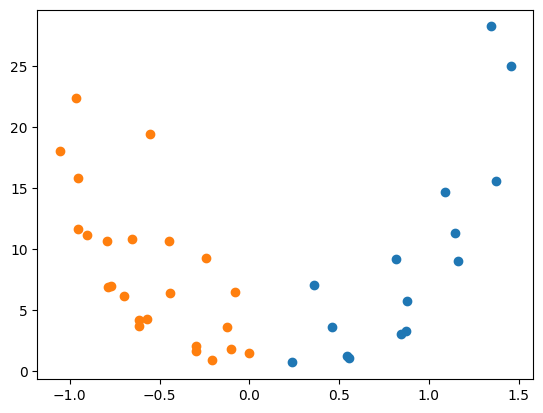

In [161]:
plt.figure()
plt.scatter(transform[fasciclesLeft,0],fits[fasciclesLeft,1])
plt.scatter(transform[fasciclesRight,0],fits[fasciclesRight,1])

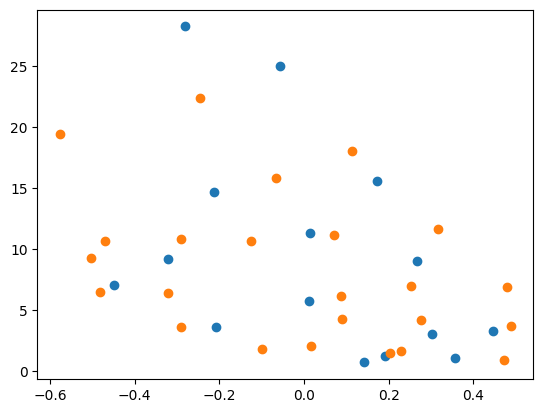

In [170]:
plt.figure()
plt.scatter(transform[fasciclesLeft,1],fits[fasciclesLeft,1])
plt.scatter(transform[fasciclesRight,1],fits[fasciclesRight,1])

In [71]:
electrodePos = np.array([6.4,-6])

In [72]:
distance = np.linalg.norm(fascPos[:,:2]-electrodePos,axis=1)

In [78]:
xdiff = fascPos[:,0]-electrodePos[0]
ydiff = fascPos[:,1]-electrodePos[1]

In [74]:
plt.figure()
plt.scatter(distance[fasciclesRight],fits[fasciclesRight,0])
plt.scatter(distance[fasciclesLeft],fits[fasciclesLeft,0])

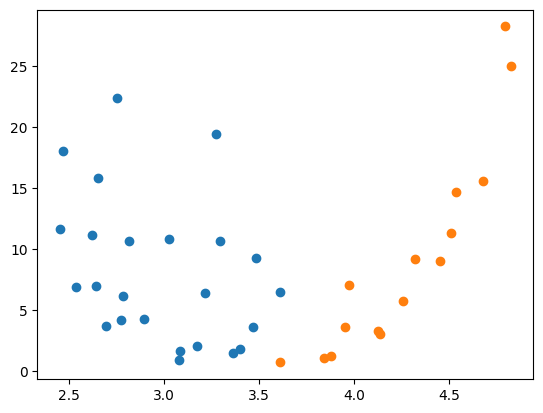

In [162]:
plt.figure()
plt.scatter(distance[fasciclesRight],fits[fasciclesRight,1])
plt.scatter(distance[fasciclesLeft],fits[fasciclesLeft,1])

In [88]:
np.max(fits[:,1])

np.float64(28.28121511781633)

In [89]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xdiff,ydiff,fits[:,1],c=fits[:,1])

In [91]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xdiff[fasciclesLeft],ydiff[fasciclesLeft],fits[fasciclesLeft,1],c=fits[fasciclesLeft,1])

In [90]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xdiff,ydiff,fits[:,0],c=fits[:,0])

In [92]:
plt.figure()
plt.scatter(ydiff[fasciclesLeft],fits[fasciclesLeft,0],c=fits[fasciclesLeft,0])

In [93]:
plt.figure()
plt.scatter(xdiff[fasciclesRight],fits[fasciclesRight,0],c=fits[fasciclesRight,0])

In [97]:
plt.figure()
plt.scatter(xdiff[fasciclesRight],fits[fasciclesRight,0],c=np.arange(39)[fasciclesRight])
plt.colorbar()

In [104]:
fascPos[23]

array([ 7.90223937, -8.77564917, -5.64631134])

In [105]:
fascPos[22]

array([ 7.08434146, -8.82167265, -5.60644058])

In [99]:
fits[fasciclesRight,0]

array([2.90800927, 2.04348734, 5.13818859, 1.67445903, 3.24035343,
       7.49410155, 4.41557936, 1.26133237, 1.76539006, 8.66504891,
       7.0012961 , 1.74200859, 1.46676047, 6.05097655, 8.14995734,
       5.98856129, 1.93269986, 6.70386916, 2.751682  , 4.53058176,
       1.33876113, 8.26670144, 2.89032306, 3.36899121])

In [103]:
xdiff[fasciclesRight]

array([1.05607678, 0.90841183, 1.12352233, 0.60767749, 0.75628119,
       1.2508125 , 0.84289245, 0.68434146, 1.50223937, 1.15455317,
       1.26993498, 0.66089269, 0.45360536, 0.96589982, 1.48160758,
       0.86011749, 0.56277484, 1.03260057, 0.68017456, 0.89005104,
       0.57781855, 1.15432114, 0.77342628, 1.00431722])

In [98]:
fasciclesRight

array([10, 11, 13, 15, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38])

In [163]:
fascicleSizes = np.array([.24*.26,.16*.16,.18*.2,.16*.16,.12*.14,.16*.16,.1*.12,.24*.2,.2*.24,.18*.2,.14*.12,
                .16*.16,.1*.08,.16*.14,.12*.12,.08*.08,.14*.12,.1*.1,.2*.18,.14*.14,.14*.12,
                .12*.12,.22*.18,.14*.14,.14*.12,.18*.18,.16*.16,.1*.16,.12*.12,.22*.22,.1*.1,.1*.08,
                .12*.12,.1*.1,.12*.1,.14*.1,.1*.1,.14*.12,.18*.16])*1e-3**2

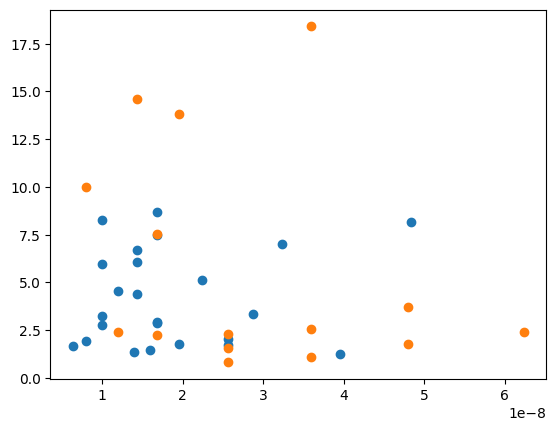

In [168]:
plt.figure()
plt.scatter(fascicleSizes[fasciclesRight],fits[fasciclesRight,0])
plt.scatter(fascicleSizes[fasciclesLeft],fits[fasciclesLeft,0])